# Handwritten Digit Recognition using CNN

MNIST dataset from `keras` has been used for this model

In [1]:
# Importing the libraries which are going to be used
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

## Data visualization and preprocessing

In this part we're going to visualize our data to know more about the data which we're going to work with.

In [15]:
# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [16]:
# Creating a function to visualize a random example from the given data
def show_random_example(images, labels):
  """By giving a images and their corresponding labels
   you would get 9 random of them"""
  random_idx = random.sample(range(len(images)), 9)
  random_images = [images[i] for i in random_idx]
  random_labels = [labels[i] for i in random_idx]

  plt.figure(figsize=(7, 8))
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(random_images[i], cmap='gist_gray')
    plt.title(f"label= {random_labels[i]}")
    plt.axis("off")
    

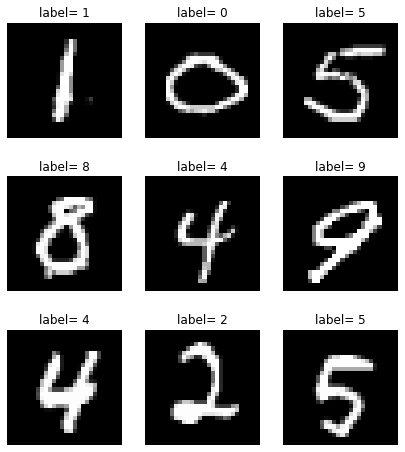

In [17]:
# Vizualize the data
show_random_example(images=x_train,
                    labels=y_train)

In [18]:
# Adding extra dimension to the inputs
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [20]:
# Normalizing the inputs
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [21]:
# Using keras API to one hot encode the labels
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Creating and training the model

In [22]:
# Constants
input_shape = x_train_norm[0].shape
batch_size = 32

In [23]:
# Creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=4,
                         kernel_size=3,
                         strides=1,
                         activation='relu',
                         input_shape=input_shape),
  tf.keras.layers.Conv2D(4, 1, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(16, 2, 1, activation='relu'),
  tf.keras.layers.Conv2D(16, 2, 1, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(32, 2, 1, activation='relu'),
  tf.keras.layers.Conv2D(32, 2, 1, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [24]:
# Adding callbacks

es = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy", 
        patience=10,
        verbose=1,
        mode="max",
        restore_best_weights=True,
     )

rp = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [25]:
# Compiling the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy']
              )

# Fitting data to the model
history = model.fit(x=x_train_norm,
                    y=y_train_one_hot,
                    epochs=100,
                    batch_size=batch_size,
                    validation_data=(x_test_norm, y_test_one_hot),
                    validation_batch_size=batch_size,
                    callbacks=[es, rp]
                    )

Epoch 1/100
1875/1875 [==============================] - 20s 5ms/step - loss: 0.3453 - accuracy: 0.8961 - val_loss: 0.2114 - val_accuracy: 0.9355 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1244 - accuracy: 0.9624 - val_loss: 0.0916 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0945 - accuracy: 0.9706 - val_loss: 0.0763 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0799 - accuracy: 0.9750 - val_loss: 0.0657 - val_accuracy: 0.9799 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0706 - accuracy: 0.9780 - val_loss: 0.0705 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0627 - accuracy: 0.9806 - val_loss: 0.0739 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 7/100
1875/1875 [===========================

## Error analysis

Text(0.5, 1.0, 'Loss per epoch')

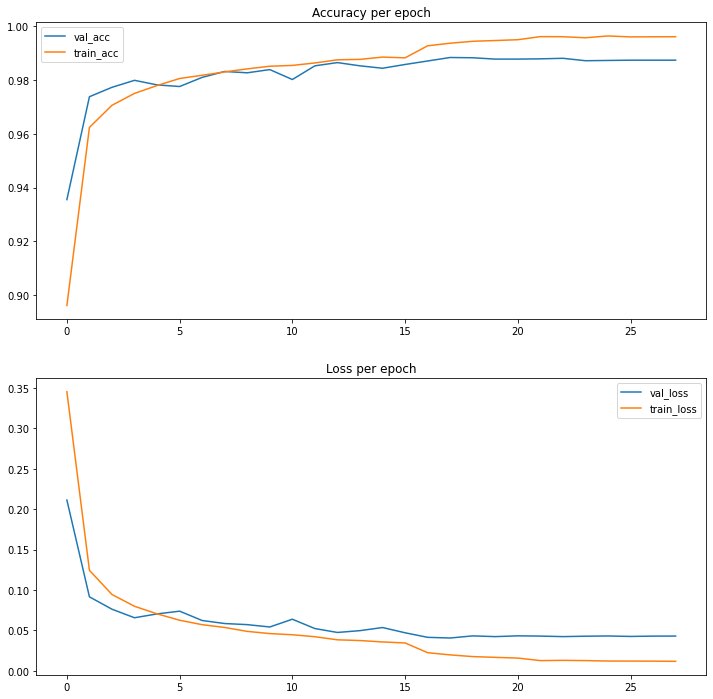

In [26]:
# Saving data from history into a pandas dataframe
val_acc = pd.DataFrame(history.history['val_accuracy'])
train_acc = pd.DataFrame(history.history['accuracy'])
val_loss = pd.DataFrame(history.history['val_loss'])
train_loss = pd.DataFrame(history.history['loss'])

# Plotting accuracy and loss curves
plt.figure(figsize=(12, 12));

plt.subplot(2, 1, 1)
plt.plot(val_acc)
plt.plot(train_acc)
plt.legend(["val_acc", "train_acc"])
plt.title("Accuracy per epoch")

plt.subplot(2, 1, 2)
plt.plot(val_loss)
plt.plot(train_loss)
plt.legend(["val_loss", "train_loss"])
plt.title("Loss per epoch")

In [37]:
# Evaluating the model
print("Evaluating...")
results = model.evaluate(x_test_norm, y_test_one_hot, verbose=0)
print("Loss on x_test_norm: %.4f" % results[0])
print("Accuracy on x_test_norm: %.4f" % results[1])

Evaluating...
Loss on x_test_norm: 0.0407
Accuracy on x_test_norm: 0.9884
